# IMPORTING NECESSARY LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# DATA PREPROCESSING

In [4]:
# Directory paths
train_dir = 'train'
val_dir = 'valid'
test_dir = 'test'

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Using smaller target size (e.g., 100x100 instead of 150x150)
target_size = (100, 100)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 3208 images belonging to 20 classes.
Found 100 images belonging to 20 classes.
Found 100 images belonging to 20 classes.


TypeError: '>=' not supported between instances of 'str' and 'int'

# BUILDING THE CNN MODEL

In [9]:
# Simplified model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(target_size[0], target_size[1], 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(20, activation='softmax')  # 525 output classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,277,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │         5,140 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,375,444 (12.88 MB)

 Trainable params: 3,375,444 (12.88 MB)

 Non-trainable params: 0 (0.00 B)

# TRAINING THE MODEL

In [29]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

history = model.fit(
    train_generator,
    epochs=30,  
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 50s 473ms/step - accuracy: 0.7842 - loss: 0.6795 - val_accuracy: 0.8500 - val_loss: 0.6121
Epoch 2/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 43s 403ms/step - accuracy: 0.7949 - loss: 0.6175 - val_accuracy: 0.8900 - val_loss: 0.3594
Epoch 3/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 42s 397ms/step - accuracy: 0.7944 - loss: 0.6330 - val_accuracy: 0.8800 - val_loss: 0.3956
Epoch 4/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 39s 370ms/step - accuracy: 0.7963 - loss: 0.6311 - val_accuracy: 0.8700 - val_loss: 0.3459
Epoch 5/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 42s 395ms/step - accuracy: 0.8171 - loss: 0.5785 - val_accuracy: 0.8600 - val_loss: 0.3824
Epoch 6/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 40s 377ms/step - accuracy: 0.8139 - loss: 0.5596 - val_accuracy: 0.8700 - val_loss: 0.3875
Epoch 7/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 40s 371ms/step - accuracy: 0.8147 - loss: 0.5630 - val_accuracy: 0.8500 - val_loss: 0.4716
Epoch 8/30
101/101 ━━━━━━━━━━━━━━━━━━━━ 39s 364ms/step - accuracy: 0.8066 - loss: 0

# EVALUATING THE MODEL

In [31]:
model.load_weights('best_model.keras')

test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

# Optionally, predict the classes
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.8913 - loss: 0.5362
Test accuracy: 0.8999999761581421
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step


# VISUALIZING THE RESULT

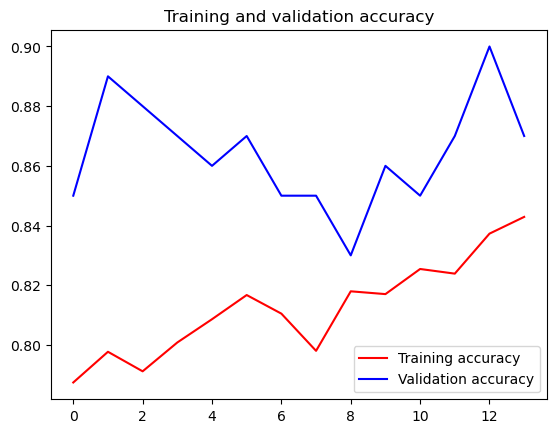

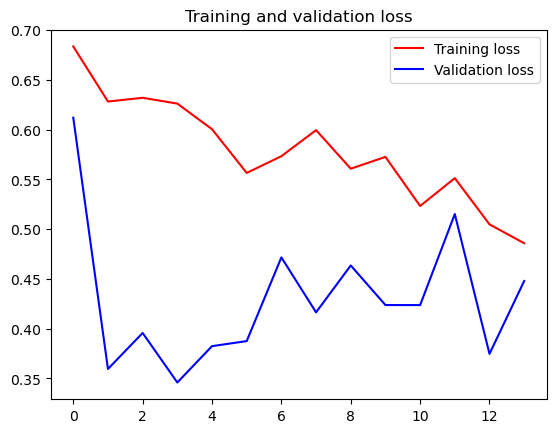

In [33]:
# Plotting training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# MAKE PREDICTION ON THE TEST DATA

In [35]:
# Make predictions on the test data
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true classes from the test generator
true_classes = test_generator.classes

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step


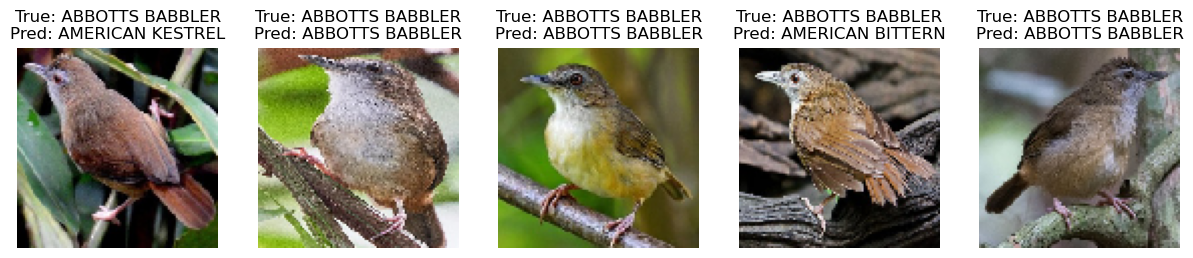

In [37]:
# Define a function to plot images with predicted and true labels
def plot_images(images, true_labels, predicted_labels, class_labels, n_images=5):
    plt.figure(figsize=(15, 15))
    for i in range(n_images):
        plt.subplot(1, n_images, i + 1)
        plt.imshow(images[i])
        plt.title(f"True: {class_labels[true_labels[i]]}\nPred: {class_labels[predicted_labels[i]]}")
        plt.axis('off')
    plt.show()

# Get a batch of images and labels from the test generator
test_images, test_labels = next(test_generator)
test_images = test_images[:15]  # Select the first 5 images
test_labels = true_classes[:15]  # Corresponding true labels
test_preds = predicted_classes[:15]  # Corresponding predicted labels

# Plot the images with their true and predicted labels
plot_images(test_images, test_labels, test_preds, class_labels)
